In [1]:
import pandas as pd
from plotnine import *
import seaborn as sns

# importing statsmodels (for linear regression in python)
import statsmodels.formula.api as smf

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Scratchpad 

Welcome to your scratchpad for this exploratory data analysis. This is your "messy notebook". 

Load some data, run summary stats, create plots to explore the data, and run some exploratory regressions.

> Sidenote 🤖 - Using R and Python in the same notebook.
>
> Just a reminder that if you're a SideQuest-er 🤖 and want to use both R and Python, you can grab the top cells in the jupyter-quickstart notebook https://github.com/dmil/jupyter-quickstart. I find that ggplot in R is a bit more flexible and feature-full than Plotnine, and there is a lot more material online on running regressions in R than using statsmodels in Python. For this reason, I generally use R for plotting and regressions, but you're welcome to use either (or both)!


## Load Data

Code for loading raw data like `pd.read_csv()` etc. -- will go into this section. 

**Data selected**: I chose the Economic Freedom Index published annually by the Heritage Foundation, a think tank. Definitions and other information about the index can be found [here](https://www.heritage.org/index/about)

In [2]:
df= pd.read_csv('data.csv')
df

,Name,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Afghanistan,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,2022,66.6,55.5,35.6,49.8,89.1,72.1,70.6,70.7,51.1,82.0,82.6,70.0,70.0
2,Algeria,2022,45.8,27.9,30.1,29.7,67.2,57.1,38.6,50.0,51.5,80.1,57.4,30.0,30.0
3,Angola,2022,52.6,39.8,20.6,25.3,86.6,86.4,80.0,37.6,53.9,61.2,70.0,30.0,40.0
4,Argentina,2022,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5147,Venezuela,1995,59.8,50.0,10.0,NaN,80.0,76.1,NaN,85.0,NaN,52.0,65.0,50.0,70.0
5148,Vietnam,1995,41.7,10.0,10.0,NaN,68.8,87.1,NaN,40.0,NaN,55.2,44.6,30.0,30.0
5149,Yemen,1995,49.8,30.0,10.0,NaN,78.2,73.4,NaN,70.0,NaN,41.8,45.0,70.0,30.0
5150,Zambia,1995,55.1,50.0,30.0,NaN,72.4,74.8,NaN,55.0,NaN,12.2,61.2,70.0,70.0


### Clean data

As you do your exploration, you may find that you need to transform the data (for example you want to extract the brand of a car from the name column, or rename 0 and 1 in the `am` column to "automatic" and "manual". I'd reccomend putting any of that code here and re-running the notebook. That way, when you come back to the notebook later, the data processing code is all at the top and you can chart or analyze whatever you want after it. 

Feel free to add as many cells as you need in this section.

### Lowercase the columns and remove spaces

In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")

### Check for null values

Some countries were not included in the survey in some years.

In [4]:
df.isna().sum()

name                         0
index_year                   0
overall_score              534
property_rights            497
government_integrity       481
judicial_effectiveness    4053
tax_burden                 518
government_spending        502
fiscal_health             4060
business_freedom           485
labor_freedom             1979
monetary_freedom           496
trade_freedom              511
investment_freedom         496
financial_freedom          518
dtype: int64

### Remove null values

In [5]:
df = df.dropna()

In [6]:
df.index_year.value_counts()

2020    180
2019    180
2018    180
2017    180
2021    178
2022    177
Name: index_year, dtype: int64

## Explore the data

### Summary Stats

This is the part of the data exploration where you get to understand what the columns are. You're welcome to pop open the data in excel as well to get a sense of it. At the very least, you'll want to run `.describe()` on your dataframe or dataframes. If you want to do a correlation matrix, you can use `.corr()` (sometimes I like to add `.round(2)` to the end of that so it doesn't report it out to too many decimal places)

In [7]:
df.describe().round(1)

,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom
count,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0
mean,2019.5,61.0,54.2,43.9,46.8,77.3,65.1,67.4,63.6,58.8,75.4,73.5,57.4,48.5
std,1.7,11.2,20.1,20.1,20.8,13.3,23.1,30.7,15.7,14.0,11.6,12.6,21.9,19.1
min,2017.0,3.0,0.2,3.8,3.9,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0
25%,2018.0,54.1,38.8,29.6,31.3,70.9,53.0,51.1,54.6,50.3,72.1,66.0,45.0,30.0
50%,2019.0,61.0,52.4,38.6,44.3,78.7,70.2,79.2,64.0,58.9,77.7,75.4,60.0,50.0
75%,2021.0,68.3,68.1,53.2,60.4,86.0,83.7,92.2,74.9,67.5,82.0,83.5,75.0,60.0
max,2022.0,90.2,100.0,99.5,98.0,100.0,97.0,100.0,96.4,92.6,91.7,95.0,95.0,90.0


In [8]:
df.corr().round(1)

,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom
index_year,1.0,-0.0,0.1,0.1,0.1,0.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.2,-0.0,0.0
overall_score,-0.0,1.0,0.8,0.8,0.8,0.1,-0.0,0.5,0.8,0.6,0.7,0.7,0.8,0.8
property_rights,0.1,0.8,1.0,0.9,0.8,-0.1,-0.3,0.2,0.8,0.4,0.5,0.6,0.7,0.7
government_integrity,0.1,0.8,0.9,1.0,0.8,-0.2,-0.4,0.2,0.7,0.4,0.4,0.5,0.6,0.7
judicial_effectiveness,0.1,0.8,0.8,0.8,1.0,-0.2,-0.3,0.2,0.7,0.4,0.4,0.5,0.6,0.6
tax_burden,0.0,0.1,-0.1,-0.2,-0.2,1.0,0.4,0.1,0.1,0.2,0.1,0.2,-0.1,-0.0
government_spending,0.0,-0.0,-0.3,-0.4,-0.3,0.4,1.0,0.1,-0.2,-0.0,-0.1,-0.2,-0.1,-0.2
fiscal_health,-0.0,0.5,0.2,0.2,0.2,0.1,0.1,1.0,0.2,0.2,0.3,0.3,0.2,0.2
business_freedom,-0.1,0.8,0.8,0.7,0.7,0.1,-0.2,0.2,1.0,0.5,0.5,0.6,0.5,0.6
labor_freedom,-0.1,0.6,0.4,0.4,0.4,0.2,-0.0,0.2,0.5,1.0,0.4,0.4,0.3,0.3


### Plots (exploratory)

Remember, always plot your distributions. You may want to try some histograms on particular columns. 

Scatter plots could also help with understanding how variables relate to one another. 

Feel free to use any plot type you think will help you better understand the data. If you think you've got a takeaway or a question, you can put that takeaway or question in a markdown cell above or below the chart. Just to remind yourself and anyone you're asking for help from, the purpose of that plot. I also like to get into the habit of titling plots [DRAFT]-NOT FOR PUBLICATION since exploratory data viz can be misleading but you might pass them around to editors or colleagues as you try to understand the data.

### Property rights and business freedom

**Interpretation**: We can see from below that property rights appears to be correlated with business freedom. We would try to confirm this later on our regression analysis.

That means, at least based on definitions provided by the Heritage Foundation that the more private property ownership is guaranteed and protected by a country, the easier it is to do business.

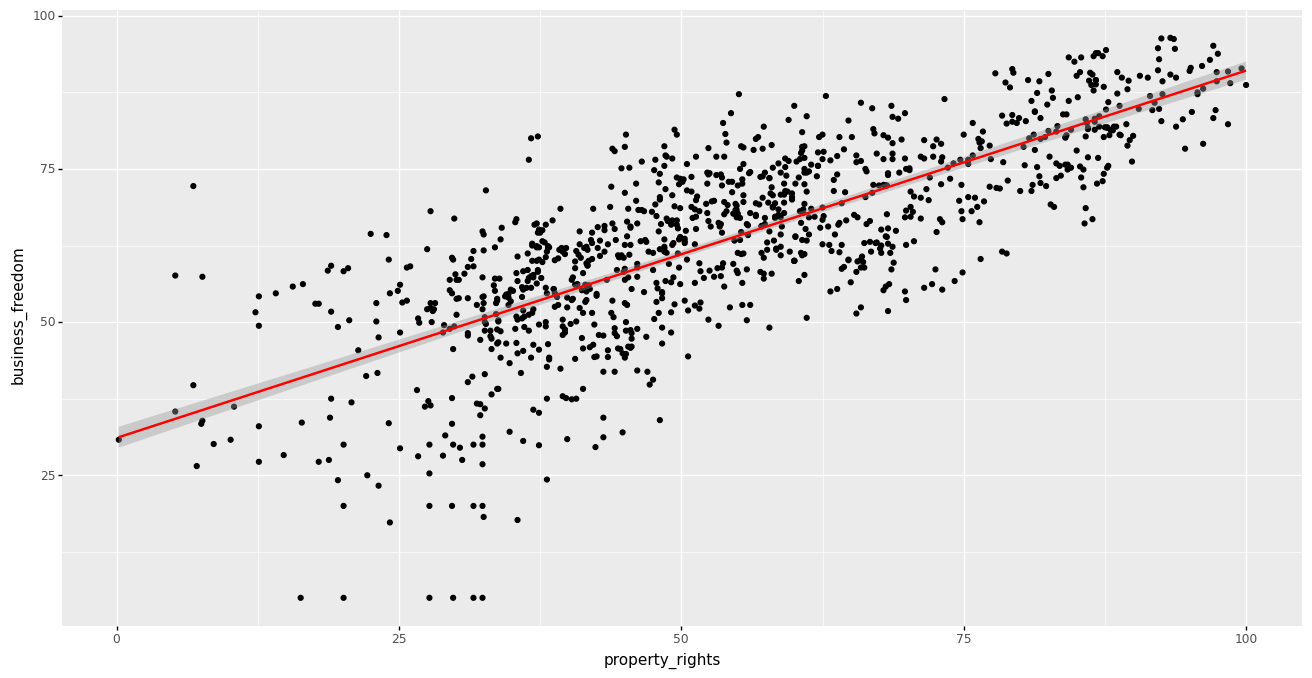

<ggplot: (298436095)>

In [9]:
(
    ggplot(df, aes(x='property_rights', y='business_freedom')) +
        geom_point() +
        geom_smooth(method='lm', color='red') +
        #facet_wrap('variable', scales='free_x') + 
        theme(figure_size=(16,8))
)

### Tax burden and investment freedom

**Interpretation**: Our hypothesis was that the lower the tax burden, the freer investment capital can enter and exit a country, or that an investor can easily enter or exit markets. There, however, appears to be no significant relationship in the two variables based in our plot.

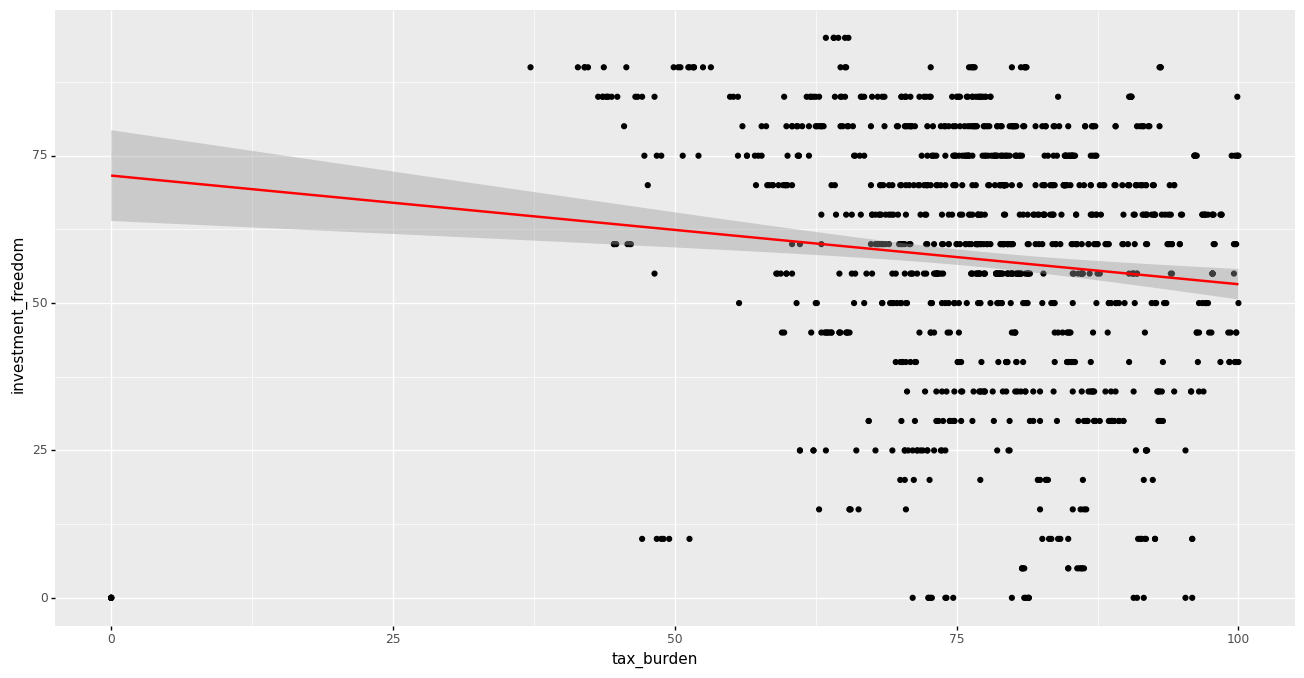

<ggplot: (298442819)>

In [10]:
(
    ggplot(df, aes(x='tax_burden', y='investment_freedom')) +
        geom_point() +
        geom_smooth(method='lm', color='red') +
        #facet_wrap() + 
        theme(figure_size=(16,8))
)

**Interpretation**: That is even if most countries appears to have tax regimes that do not burden investors as much.

<AxesSubplot:>

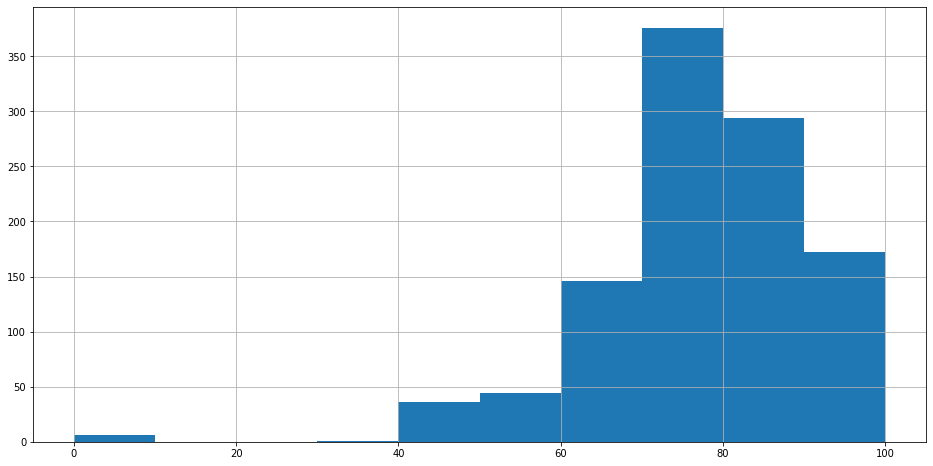

In [11]:
df.tax_burden.hist(figsize=(16,8))

### Government integrity and freedoms

This one's interesting. We looked at how government integrity, defined using a measure of corruption from the Transparency International's Corruption Perceptions Index, correlate with business, investment and trade freedoms. See how they differ below.

### Business freedom

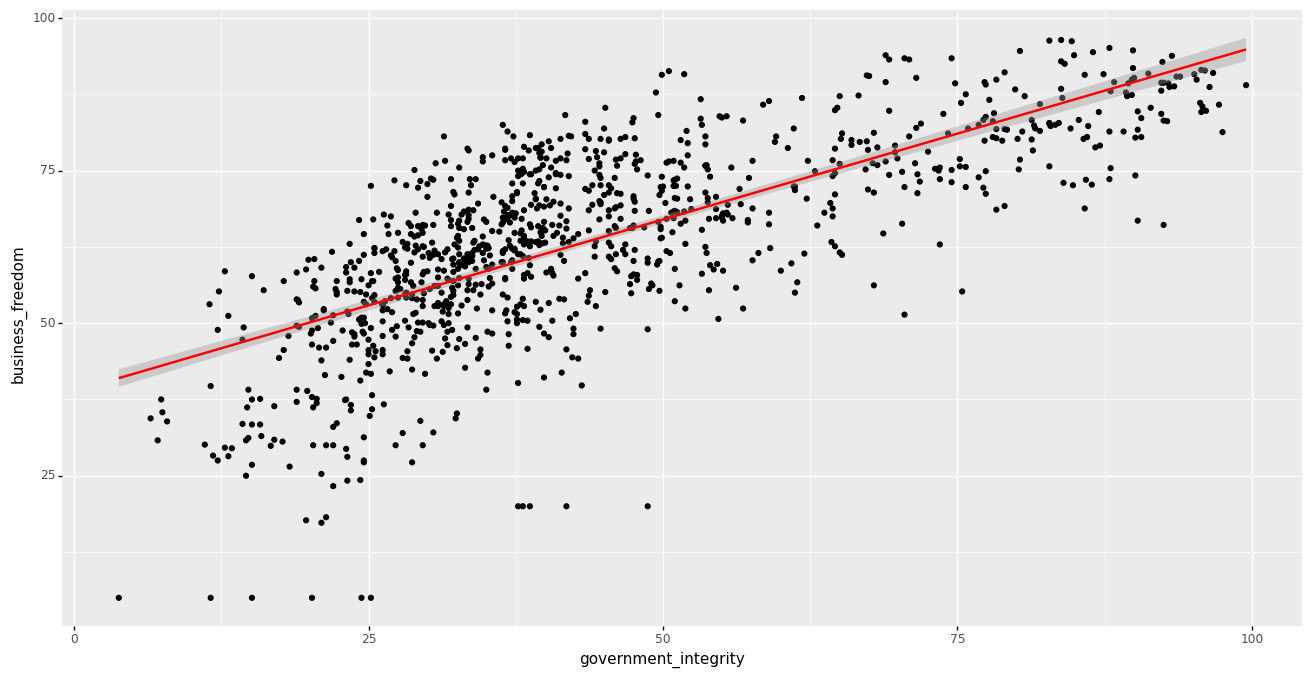

<ggplot: (298649267)>

In [12]:
(
    ggplot(df, aes(x='government_integrity', y='business_freedom')) +
        geom_point() +
        geom_smooth(method='lm', color='red') +
        #facet_wrap() + 
        theme(figure_size=(16,8))
)

### Trade freedom

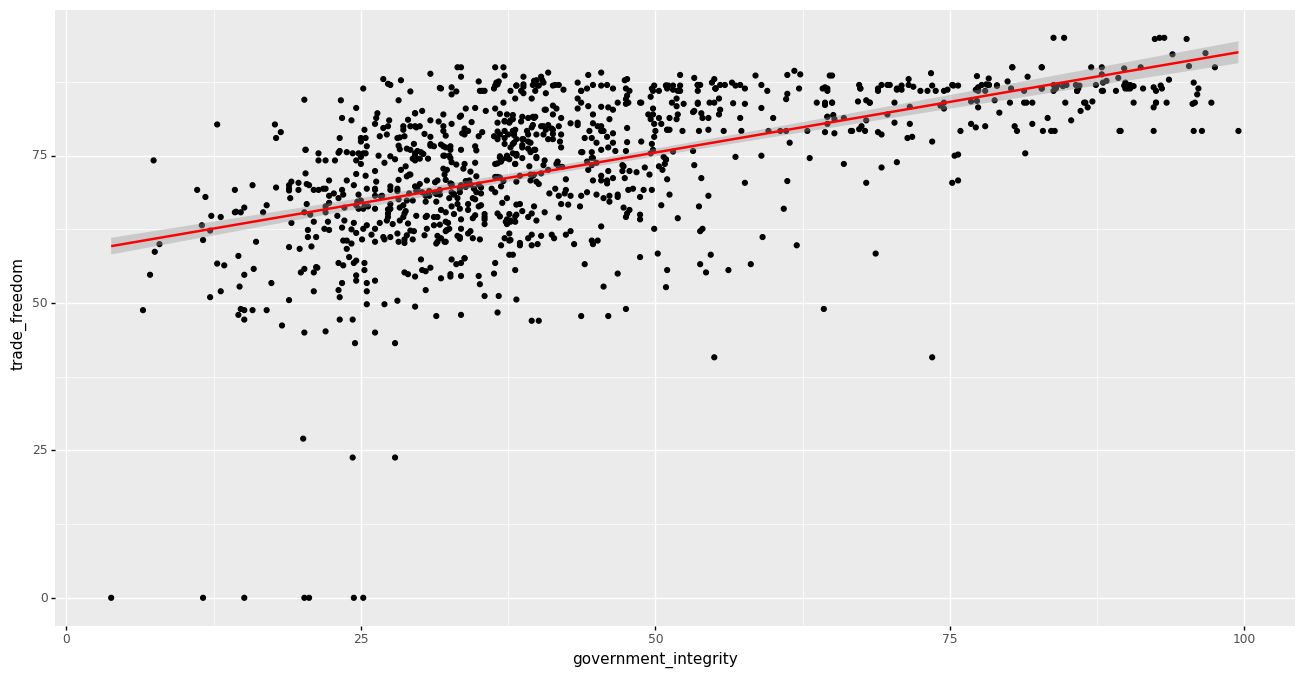

<ggplot: (298685059)>

In [13]:
(
    ggplot(df, aes(x='government_integrity', y='trade_freedom')) +
        geom_point() +
         geom_smooth(method='lm', color='red') +
        #facet_wrap() + 
        theme(figure_size=(16,8))
)

### Investment freedom

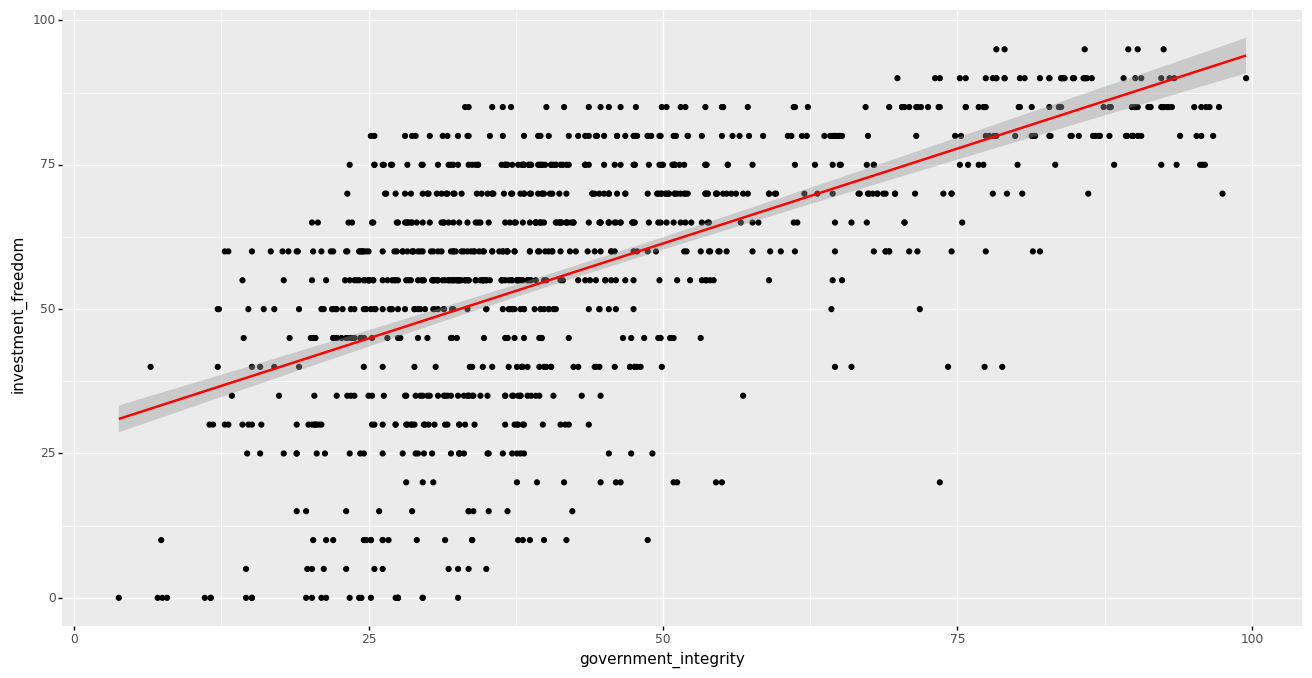

<ggplot: (298730391)>

In [14]:
(
    ggplot(df, aes(x='government_integrity', y='investment_freedom')) +
        geom_point() +
        geom_smooth(method='lm', color='red') +
        #facet_wrap() + 
        theme(figure_size=(16,8))
)

**Interpretation**: It's interesting to see how the level of perceived corruption appearing to correlate, albeit at varying levels, with business and trade freedom. This indicates that the more a country is perceived less corrupt, the more business activities prosper. That relationship appears to be stronger than that with trade.

No obvious relationship can be gleaned from between perceived level of public corruption and how free investment capital movements is.

### Regressions and Models (exploratory)

This is where you start using some of the more advanced statsitical techniques you've learned so far to understand the data better. Wondering if the differences between two means is significant? You want to try a t-test. Alternatively, this is a good place to play around with regressions to better understand how variables in your dataset relate to one another. You might want to put the takeaway from the regression model in the cell below, just so you don't forget what exploration you did and what it means.

### Business freedom and the rule of law

The Heritage Foundation lumps the three independent variables below under the **rule of law** subindex. Below, we try to measure their relationship to business freedom by regressing each of them against it and then deducting each on the model.

In [15]:
model = smf.ols("business_freedom ~ government_integrity + judicial_effectiveness + property_rights", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_freedom   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     554.0
Date:                Fri, 25 Mar 2022   Prob (F-statistic):          2.69e-217
Time:                        19:41:38   Log-Likelihood:                -3979.1
No. Observations:                1075   AIC:                             7966.
Df Residuals:                    1071   BIC:                             7986.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 31.5525      0.868     36.357      0.000      29.850      33.255
government_integrity       0.1114      0.034      3.304      0.001       0.045       0.178
judicial_effectiveness     0.1080      0.030      3.660      0.000       0.050       0.166
property_rights            0.4075      0.034     12.038      0.000       0.341       0.474
==============================================================================
Omnibus:                       91.511   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.436
Skew:                          -0.635   Prob(JB):                     5.27e-31
Kurtosis:                       4.226   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation**: We see that all rule of law variables have a significant relationship with business freedom, but that the capacity to own a private property and be guaranteed such protection in a state is the better predictor of how buoyant business activities than the other two.

Nearly 61% of variance in business freedom across countries can be explained by the three "rights". 

From our model, we can see that for every 1 point increase in the property rights index, there is a 0.4 point increase in the measure of business freedom.

### Business freedom without property rights

In [16]:
model = smf.ols("business_freedom ~ government_integrity + judicial_effectiveness", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_freedom   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     668.8
Date:                Fri, 25 Mar 2022   Prob (F-statistic):          2.87e-189
Time:                        19:41:38   Log-Likelihood:                -4047.3
No. Observations:                1075   AIC:                             8101.
Df Residuals:                    1072   BIC:                             8116.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 36.7191      0.803     45.708      0.000      35.143      38.295
government_integrity       0.3409      0.030     11.506      0.000       0.283       0.399
judicial_effectiveness     0.2540      0.029      8.868      0.000       0.198       0.310
==============================================================================
Omnibus:                       67.949   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.159
Skew:                          -0.559   Prob(JB):                     4.36e-20
Kurtosis:                       3.861   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation**: Removing the property rights, which has the strongest relationship with business freedom, it shows that the level of perceived corruption in the public sector and capacity of courts to resolve cases efficiently have stronger relationships with business freedom, although a slightly lower R2.

### Business freedom without judicial effectiveness

In [17]:
model = smf.ols("business_freedom ~ government_integrity + property_rights", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_freedom   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     814.9
Date:                Fri, 25 Mar 2022   Prob (F-statistic):          6.46e-216
Time:                        19:41:38   Log-Likelihood:                -3985.8
No. Observations:                1075   AIC:                             7978.
Df Residuals:                    1072   BIC:                             7992.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               31.6614      0.872     36.294      0.000      29.950      33.373
government_integrity     0.1611      0.031      5.189      0.000       0.100       0.222
property_rights          0.4585      0.031     14.771      0.000       0.398       0.519
==============================================================================
Omnibus:                      117.043   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.729
Skew:                          -0.716   Prob(JB):                     2.12e-45
Kurtosis:                       4.595   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation**: Property rights have a stronger relationship with business freedom without the judicial effectiveness measure. Sixty percent of the variance in business freedom across territories are predicted by property rights and the perceived level of corruption in the bureaucracy. This was nearly as high as our first run when judicial effectiveness was included into the mix. 

It appears that how efficient courts dispose of cases is a weak predictor of business freedom.

### Investment freedom and property rights

In [18]:
model = smf.ols("investment_freedom ~ government_integrity + property_rights", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     investment_freedom   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     411.6
Date:                Fri, 25 Mar 2022   Prob (F-statistic):          2.31e-133
Time:                        19:41:38   Log-Likelihood:                -4535.3
No. Observations:                1075   AIC:                             9077.
Df Residuals:                    1072   BIC:                             9092.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               19.2404      1.454     13.228      0.000      16.386      22.094
government_integrity     0.1415      0.052      2.733      0.006       0.040       0.243
property_rights          0.5892      0.052     11.385      0.000       0.488       0.691
==============================================================================
Omnibus:                       63.128   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.929
Skew:                          -0.628   Prob(JB):                     1.46e-16
Kurtosis:                       3.220   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation**: We can see that even in investment freedom, property rights have a significant relationship. Combined with corruption perception (government integrity), 43% of the variance in investment freedom can be explained by the two. 

### Government spending and fiscal health

In [19]:
model = smf.ols("business_freedom ~ government_spending:fiscal_health", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_freedom   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4054
Date:                Fri, 25 Mar 2022   Prob (F-statistic):              0.524
Time:                        19:41:39   Log-Likelihood:                -4482.4
No. Observations:                1075   AIC:                             8969.
Df Residuals:                    1073   BIC:                             8979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            64.0877      0.929     69.015      0.000      62.266      65.910
government_spending:fiscal_health    -0.0001      0.000     -0.637      0.524      -0.000       0.000
==============================================================================
Omnibus:                       66.341   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.349
Skew:                          -0.576   Prob(JB):                     1.31e-18
Kurtosis:                       3.716   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Specific countries

Below we isolate specific countries and run regression on them

In [28]:
us = df[df.name=="United States"]
us

,name,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom
175,United States,2022,72.1,95.7,75.7,77.9,75.9,54.5,0.0,87.5,75.8,82.3,75.2,85.0,80.0
359,United States,2021,74.8,79.7,76.8,72.4,76.0,62.2,34.9,82.5,87.1,81.1,80.4,85.0,80.0
545,United States,2020,76.6,81.8,77.2,83.7,74.6,56.5,54.3,83.3,87.9,75.5,79.8,85.0,80.0
731,United States,2019,76.8,79.3,77.4,78.6,75.1,57.1,53.1,83.8,89.4,76.6,86.6,85.0,80.0
917,United States,2018,75.7,79.3,71.9,76.9,65.1,56.5,54.8,82.7,91.4,78.6,86.7,85.0,80.0
1103,United States,2017,75.1,81.3,78.1,75.1,65.3,55.9,53.3,84.4,91.0,80.1,87.1,80.0,70.0


In [29]:
germany = df[df.name=="Germany"]
germany

,name,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom
60,Germany,2022,76.1,95.7,89.4,95.3,59.9,34.5,90.4,87.2,52.3,79.5,79.2,80.0,70.0
244,Germany,2021,72.5,78.8,81.5,69.8,60.4,40.3,92.8,82.4,53.0,77.2,84.0,80.0,70.0
428,Germany,2020,73.5,80.5,82.8,74.3,60.9,42.2,92.9,82.8,53.0,76.7,86.4,80.0,70.0
614,Germany,2019,73.5,79.9,81.3,75.4,60.8,42.3,91.8,83.3,52.8,77.9,86.0,80.0,70.0
800,Germany,2018,74.2,81.0,75.3,78.0,61.3,41.3,90.8,86.1,53.3,86.2,86.9,80.0,70.0
986,Germany,2017,73.8,82.9,77.7,79.5,61.9,41.4,89.9,86.6,42.8,85.9,87.0,80.0,70.0


In [30]:
japan = df[df.name=="Japan"]
japan

,name,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom
79,Japan,2022,69.9,94.6,81.4,95.3,67.4,52.5,19.7,78.3,66.6,87.1,75.4,60.0,60.0
263,Japan,2021,74.1,87.8,82.0,75.5,67.8,57.8,67.5,85.9,79.0,85.1,80.4,60.0,60.0
448,Japan,2020,73.3,86.6,80.5,71.4,68.3,55.8,62.0,81.4,78.7,84.4,80.0,70.0,60.0
634,Japan,2019,72.1,84.1,78.0,68.5,68.2,55.0,55.7,80.5,79.0,85.9,80.0,70.0,60.0
820,Japan,2018,72.3,86.0,79.2,73.2,67.4,54.1,49.3,81.7,79.2,85.4,82.3,70.0,60.0
1006,Japan,2017,69.6,89.4,86.1,73.8,68.5,52.3,9.5,82.3,77.5,83.0,82.6,70.0,60.0


# Specific regional blocs

The number of samples are too small to run a regression and therefore make some sense of the data. We therefore look instead into different regional blocs.

## Asean-5

In [34]:
asean = ["Philippines", "Vietnam", "Thailand", "Indonesia", "Malaysia"]
asean = df[df['name'].isin(asean)].reset_index(drop=True)
asean

,name,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom
0,Indonesia,2022,64.4,38.6,39.9,43.2,85.3,91.2,80.1,66.6,59.3,80.3,78.6,50.0,60.0
1,Malaysia,2022,68.1,65.6,53.9,57.6,83.8,82.9,73.4,67.1,57.0,83.6,82.2,60.0,50.0
2,Philippines,2022,61.1,47.1,34.7,25.6,76.8,84.2,81.8,61.5,58.0,69.4,73.8,60.0,60.0
3,Thailand,2022,63.2,44.2,38.5,36.2,81.3,84.4,89.8,63.4,59.6,74.2,71.6,55.0,60.0
4,Vietnam,2022,60.6,49.6,33.6,33.8,80.9,85.5,78.8,73.6,53.9,68.8,78.8,40.0,50.0
5,Indonesia,2021,66.9,59.4,39.1,48.9,83.7,91.8,90.7,71.3,49.2,79.0,79.2,50.0,60.0
6,Malaysia,2021,74.4,85.1,53.2,70.5,83.8,84.3,79.4,86.7,73.9,83.6,82.4,60.0,50.0
7,Philippines,2021,64.1,57.0,40.6,34.5,76.8,87.4,94.3,58.2,57.7,68.7,74.2,60.0,60.0
8,Thailand,2021,69.7,60.0,45.1,48.1,81.5,86.0,96.4,85.3,64.3,74.4,80.0,55.0,60.0
9,Vietnam,2021,61.7,51.3,38.0,35.9,80.3,86.0,82.8,65.2,62.6,69.0,79.0,40.0,50.0


In [36]:
g7 = ["United States", "Germany", "United Kingdom", "Japan", "Canada", "France", "Italy"]
g7 = df[df['name'].isin(g7)].reset_index(drop=True)
g7

,name,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom
0,Canada,2022,76.6,89.5,86.7,96.4,75.7,39.6,62.8,78.8,68.7,78.2,83.2,80.0,80.0
1,France,2022,65.9,93.8,75.9,85.5,52.1,0.5,39.1,81.9,58.8,79.1,79.2,75.0,70.0
2,Germany,2022,76.1,95.7,89.4,95.3,59.9,34.5,90.4,87.2,52.3,79.5,79.2,80.0,70.0
3,Italy,2022,65.4,81.7,57.3,78.6,57.7,20.6,49.0,73.8,70.4,86.2,79.2,80.0,50.0
4,Japan,2022,69.9,94.6,81.4,95.3,67.4,52.5,19.7,78.3,66.6,87.1,75.4,60.0,60.0
5,United Kingdom,2022,72.7,96.2,87.1,85.9,65.4,46.3,22.6,79.1,62.1,83.0,84.2,80.0,80.0
6,United States,2022,72.1,95.7,75.7,77.9,75.9,54.5,0.0,87.5,75.8,82.3,75.2,85.0,80.0
7,Canada,2021,77.9,84.5,87.9,73.3,76.0,49.8,84.2,81.4,72.4,76.1,88.8,80.0,80.0
8,France,2021,65.7,82.2,80.1,69.2,50.7,6.3,69.0,80.2,44.8,77.3,84.0,75.0,70.0
9,Germany,2021,72.5,78.8,81.5,69.8,60.4,40.3,92.8,82.4,53.0,77.2,84.0,80.0,70.0


## Business freedom and gov't integrity

In [35]:
model = smf.ols("business_freedom ~ government_integrity", data=asean)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_freedom   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     12.46
Date:                Fri, 25 Mar 2022   Prob (F-statistic):            0.00146
Time:                        20:10:52   Log-Likelihood:                -108.08
No. Observations:                  30   AIC:                             220.2
Df Residuals:                      28   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               38.8396      9.013      4.309      0.000      20.378      57.301
government_integrity     0.7733      0.219      3.531      0.001       0.325       1.222
==============================================================================
Omnibus:                        2.441   Durbin-Watson:                   2.667
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.444
Skew:                          -0.522   Prob(JB):                        0.486
Kurtosis:                       3.252   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model = smf.ols("business_freedom ~ government_integrity", data=g7)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_freedom   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     38.82
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           2.24e-07
Time:                        20:13:24   Log-Likelihood:                -121.11
No. Observations:                  42   AIC:                             246.2
Df Residuals:                      40   BIC:                             249.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               54.4776      4.456     12.225      0.000      45.471      63.484
government_integrity     0.3601      0.058      6.231      0.000       0.243       0.477
==============================================================================
Omnibus:                        0.472   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.790   Jarque-Bera (JB):                0.532
Skew:                           0.230   Prob(JB):                        0.767
Kurtosis:                       2.695   Cond. No.                         502.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Business freedom and property rights

In [38]:
model = smf.ols("business_freedom ~ property_rights", data=asean)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_freedom   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     35.96
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.84e-06
Time:                        20:15:09   Log-Likelihood:                -101.21
No. Observations:                  30   AIC:                             206.4
Df Residuals:                      28   BIC:                             209.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          36.2589      5.799      6.252      0.000      24.380      48.138
property_rights     0.5916      0.099      5.997      0.000       0.390       0.794
==============================================================================
Omnibus:                        0.565   Durbin-Watson:                   2.610
Prob(Omnibus):                  0.754   Jarque-Bera (JB):                0.255
Skew:                           0.225   Prob(JB):                        0.880
Kurtosis:                       2.969   Cond. No.                         256.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model = smf.ols("business_freedom ~ property_rights", data=g7)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_freedom   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     24.45
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.41e-05
Time:                        20:15:25   Log-Likelihood:                -125.34
No. Observations:                  42   AIC:                             254.7
Df Residuals:                      40   BIC:                             258.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.6817      9.986      3.273      0.002      12.500      52.864
property_rights     0.5797      0.117      4.944      0.000       0.343       0.817
==============================================================================
Omnibus:                        0.313   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.492
Skew:                           0.009   Prob(JB):                        0.782
Kurtosis:                       2.470   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Thoughts 👉 

In the cells below, freewrite your thoughts, takeaways, burning questions, etc...

I reccomend bullet point format...but some people think in paragraphs and that's fine too! This is to help you synthesize the exporation you've just done and think through where you might go next.

Are there questions you have that will require reporting to answer? Questions that will require expert statistical help? Are there variables your data doesn't consider or additional data that you need to join to this data? Is there a budding seed of a pitch somewhere?

* What makes property rights offset other determinants in terms of their effect on business and investment freedoms? 

* The amount the government spends and its interaction with how healthy the government's balance sheet is have no relationship with business freedom. Does it make sense in reality?
*
*
*
*